In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True


results = []
num_classes = 2

learning_rate = 0.001
samples = 2000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [False]:
            for EPS1 in [0.1]:
                for n in [10000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            

                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)

                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='uniform')

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state=42)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2, random_state=42)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                acc_train = nn.get_results(net, train_loader, input_size)
                                acc_test =nn.get_results(net, test_loader, input_size)
                                results.append([acc_train, acc_test, epsilon, batch_size, hidden_size, aux_loss_activated, EPS1, n, opt])
                                pd.DataFrame(results, columns=['acc_train', 'acc_test', 'epsilon', 'batch_size', 'hidden_size',
                                    'aux_loss_activated', 'EPS1', 'n', 'opt']).to_csv('07-03-2022-results_2d.csv')
                            except Exception as e:
                                print(e) 
                                print(str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
377989    0.38000         0.000001               1    0.363333  113.380711   
165064    0.32400         0.000000               1    0.416107   30.211445   
21425     0.03050         0.449257               5    0.326667    1.097332   
51237     0.10025         0.002341               6    0.341880   28.713619   
147534    0.02675         0.534269              16    0.311927   61.331596   
...           ...              ...             ...         ...         ...   
99521     0.07100         0.001548               7    0.363636   77.730893   
65722     0.04000         0.000512               4    0.276667   30.948538   
279684    0.01950         0.169019               3    0.314381   20.103544   
370559    0.38350         0.000000               1    0.430000   62.802689   
175567    0.22800         0.003567               1    0.36

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Epochs:  10000
Epoch:  0
training: epoch:  1  loss:  16.77214527130127 -- aux loss:  0.0
validating: epoch:  1  loss:  2.6251845955848694
Epoch:  1
training: epoch:  2  loss:  15.457277238368988 -- aux loss:  0.0
validating: epoch:  2  loss:  2.621879279613495
Epoch:  2
training: epoch:  3  loss:  14.054799795150757 -- aux loss:  0.0
validating: epoch:  3  loss:  2.6312175989151
Epoch:  3
training: epoch:  4  loss:  12.606297850608826 -- aux loss:  0.0
validating: epoch:  4  loss:  2.4407994151115417
Epoch:  4
training: epoch:  5  loss:  11.370279669761658 -- aux loss:  0.0
validating: epoch:  5  loss:  2.089081585407257
Epoch:  5
training: epoch:  6  loss:  10.403200328350067 -- aux loss:  0.0
validating: epoch:  6  loss:  1.651149183511734
Epoch:  6
training: epoch:  7  loss:  9.647753834724426 -- aux loss:  0.0
validating: epoch:  7  loss:  1.2485782206058502
Epoch:  7
training: epoch:  8  loss:  9.031134307384491 -- aux loss:  0.0
validating: epoch:  8  loss:  0.9258882254362106
Ep

training: epoch:  51  loss:  3.4308358281850815 -- aux loss:  0.0
validating: epoch:  51  loss:  0.024818723555654287
Epoch:  51
training: epoch:  52  loss:  3.3978593349456787 -- aux loss:  0.0
validating: epoch:  52  loss:  0.025366419926285744
Epoch:  52
training: epoch:  53  loss:  3.3655167520046234 -- aux loss:  0.0
validating: epoch:  53  loss:  0.02590837888419628
Epoch:  53
training: epoch:  54  loss:  3.3343139812350273 -- aux loss:  0.0
validating: epoch:  54  loss:  0.02642576675862074
Epoch:  54
training: epoch:  55  loss:  3.3041068464517593 -- aux loss:  0.0
validating: epoch:  55  loss:  0.026928292121738195
Epoch:  55
training: epoch:  56  loss:  3.274540536105633 -- aux loss:  0.0
validating: epoch:  56  loss:  0.027536573819816113
Epoch:  56
training: epoch:  57  loss:  3.245487965643406 -- aux loss:  0.0
validating: epoch:  57  loss:  0.028231674805283546
Epoch:  57
training: epoch:  58  loss:  3.2171825170516968 -- aux loss:  0.0
validating: epoch:  58  loss:  0.02

Accuracy of the network on test objects: 63 %
63
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  100
training: epoch:  101  loss:  2.2820954993367195 -- aux loss:  0.0
validating: epoch:  101  loss:  0.06647736532613635
Epoch:  101
training: epoch:  102  loss:  2.263842899352312 -- aux loss:  0.0
validating: epoch:  102  loss:  0.06748343422077596
Epoch:  102
training: epoch:  103  loss:  2.2458472698926926 -- aux loss:  0.0
validating: epoch:  103  loss:  0.0682881185784936
Epoch:  103
training: epoch:  104  loss:  2.2280623503029346 -- aux loss:  0.0
validating: epoch:  104  loss:  0.06930492958053946
Epoch:  104
training: epoch:  105  loss:  2.2110899053514004 -- aux loss:  0.0
validating: epoch:  105  loss:  0.07034974521957338
Epoch:  105
training: 

In [2]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 65 %
65


array(65)

In [3]:
torch.save(net.state_dict(), 'model.pkl')

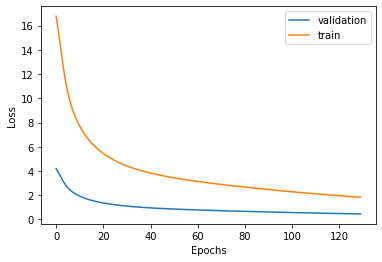

In [4]:
plt.plot(hist_val, label ='validation')
plt.plot(hist_train, label ='train')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('images/'+str(samples)+'_'+str(epsilon)+'_'+str(n)+"_"+str(hidden_size)+"_Loss_Training.png")
plt.show()

In [5]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [6]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

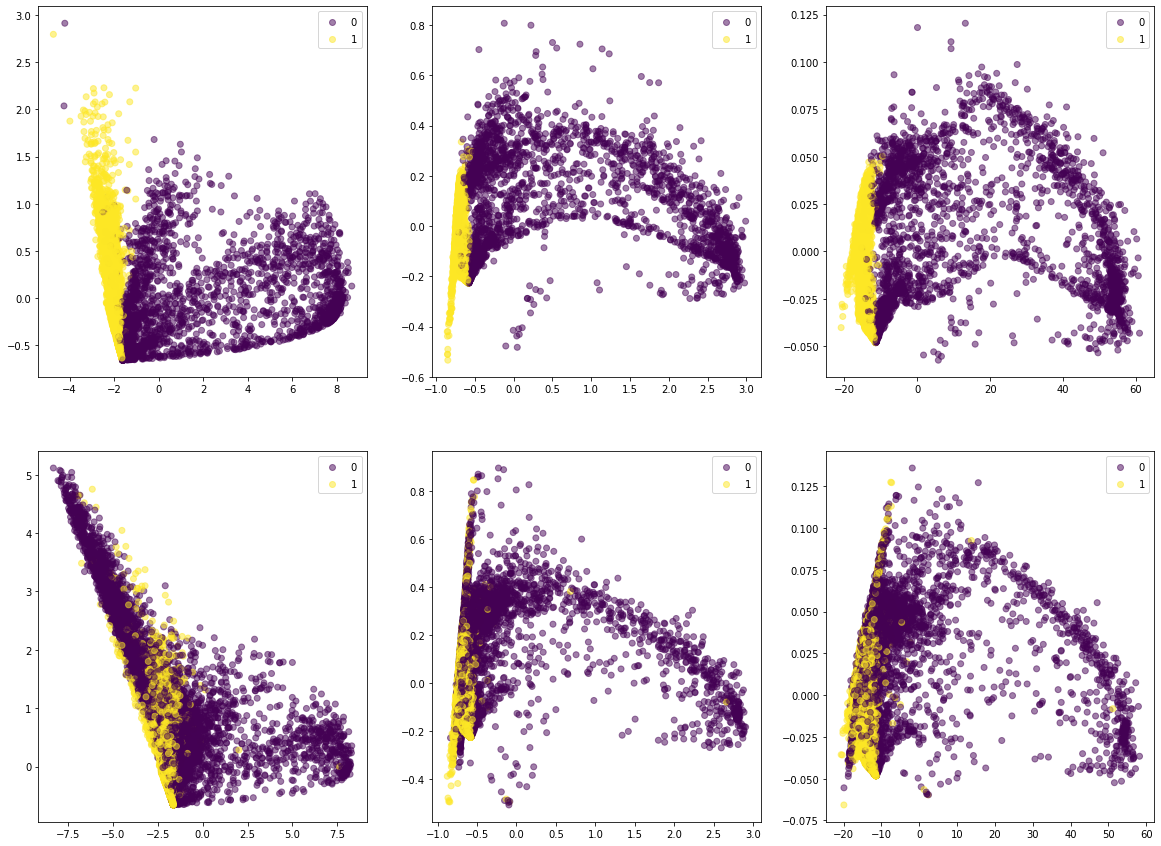

In [7]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

first
first ..
first ...


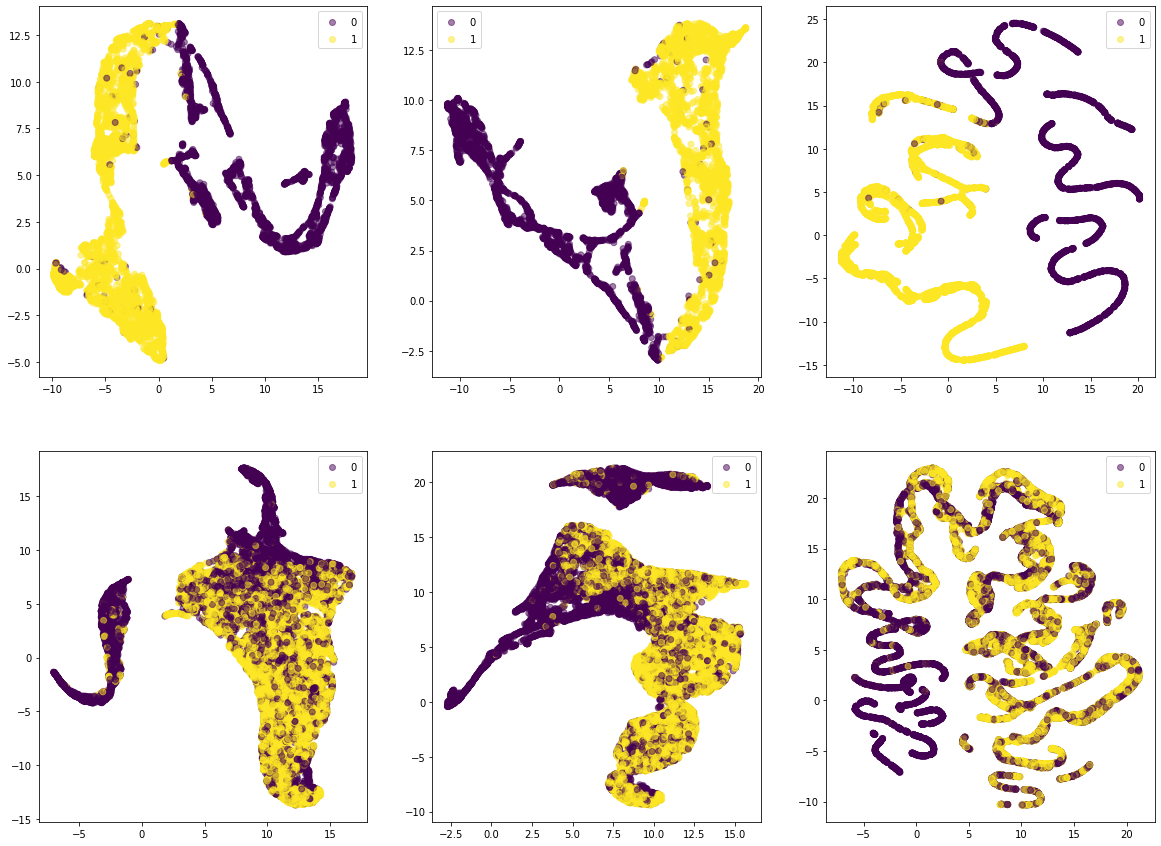

In [8]:
import umap

fig, axs = plt.subplots(2, 3, figsize=(20,15))
print('first')
reducer = umap.UMAP()
print('first ..')
mapper_train = reducer.fit_transform(intermediates.numpy())
print('first ...')
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 0])
ut.plot_representations(mapper_test, labels_test, axs[1, 0])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(intermediates2.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates2_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 1])
ut.plot_representations(mapper_test, labels_test, axs[1, 1])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(outputs.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(outputs_test.numpy())

ut.plot_representations(mapper_train, labels, axs[0, 2])
ut.plot_representations(mapper_test, labels_test, axs[1, 2])

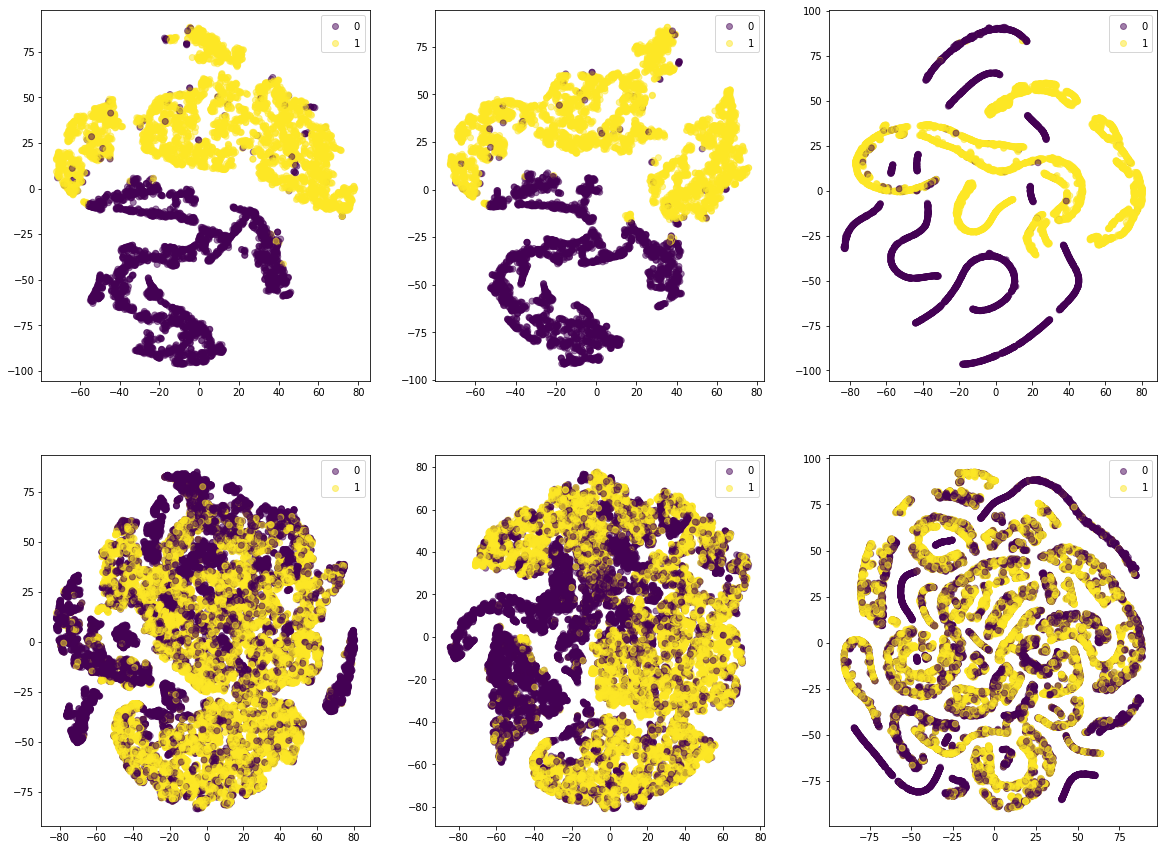

In [9]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

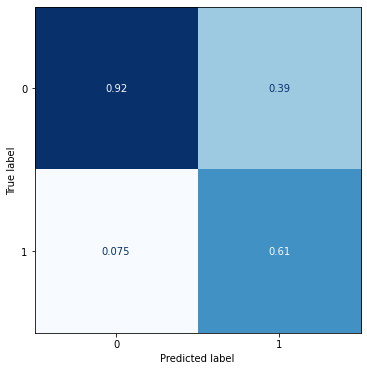

In [26]:
#fig, ax = plt.subplots(1, 1, figsize=(15,15))
#curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
#pred_labels = probs_train.argmax(1, keepdim = True)
#ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)

In [11]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

In [12]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [13]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

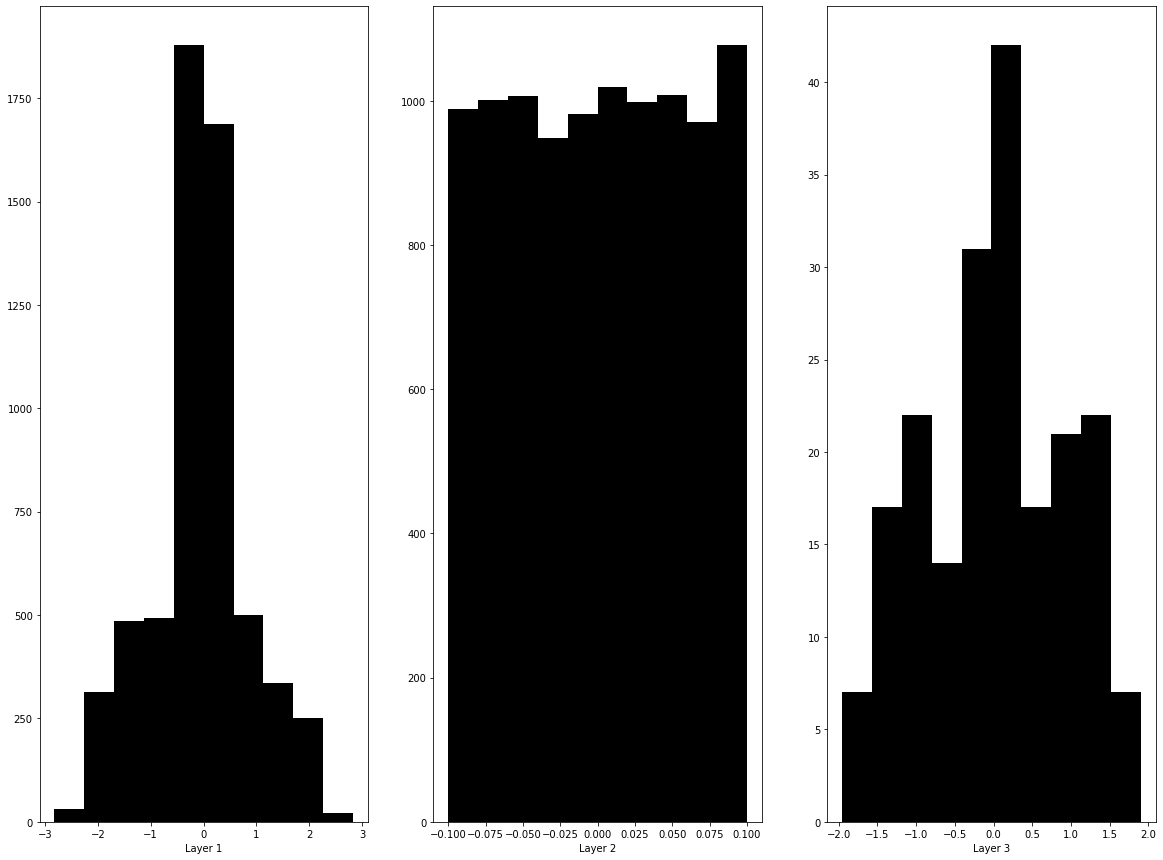

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()

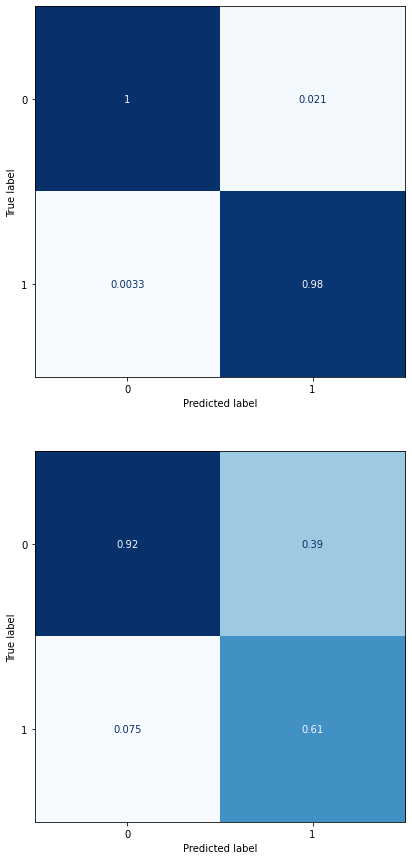

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = torch.argmax(probs_train, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = torch.argmax(probs_test, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)